<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

**CLEANING**

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Walmart_Store_sales (1).csv')

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [5]:
print(df.shape)
df.describe(include='all')

(150, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [7]:
missing_values = df.isnull().mean() * 100
missing_values.sort_values(ascending=False)

Date            12.000000
Temperature     12.000000
Unemployment    10.000000
Weekly_Sales     9.333333
Fuel_Price       9.333333
Holiday_Flag     8.000000
CPI              8.000000
Store            0.000000
dtype: float64

In [8]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Date'].isnull().sum()

np.int64(18)

In [9]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,2012-07-27,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaT,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,2010-06-11,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,2011-08-12,856796.10,0.0,86.05,3.638,219.007525,NaN


In [10]:
df_cleaned = df.copy()

temperature_mean = df_cleaned['Temperature'].mean()
df_cleaned['Temperature'] = df_cleaned['Temperature'].fillna(temperature_mean)
df_cleaned['Temperature'].isnull().sum()

np.int64(0)

In [11]:
#Remplacement par interpolation
#on trie par date pour assurer une interpolation cohérente
df_cleaned = df_cleaned.sort_values(by='Date')

columns_to_interpolate = ['Fuel_Price', 'CPI', 'Unemployment']
df_cleaned[columns_to_interpolate] = df_cleaned[columns_to_interpolate].interpolate(method='linear')

# Remplacer les valeurs manquantes dans Holiday_Flag par 0
df_cleaned['Holiday_Flag'] = df_cleaned['Holiday_Flag'].fillna(0)



In [12]:
missing_values = df_cleaned.isnull().mean() * 100
missing_values.sort_values(ascending=False)

Date            12.000000
Weekly_Sales     9.333333
Store            0.000000
Holiday_Flag     0.000000
Temperature      0.000000
Fuel_Price       0.000000
CPI              0.000000
Unemployment     0.000000
dtype: float64

In [13]:
df_cleaned.shape

(150, 8)

In [14]:
# Supprimer les valeurs manquantes
df_sumsales = df_cleaned.dropna(subset=['Weekly_Sales']).copy()
df_sumsales.shape

(136, 8)

In [15]:
df_sumsales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
67,3.0,2010-02-05,461622.22,0.0,45.710000,2.572,214.424881,7.368000
44,1.0,2010-02-12,1641957.44,1.0,38.510000,2.548,211.242170,8.106000
107,8.0,2010-02-12,994801.40,1.0,33.340000,2.548,214.621419,6.299000
112,2.0,2010-02-19,2124451.54,0.0,39.690000,2.514,210.945160,7.196667
115,15.0,2010-02-19,660838.75,0.0,61.398106,2.909,131.637000,8.094333


In [16]:
df_sumsales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 67 to 146
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         136 non-null    float64       
 1   Date          118 non-null    datetime64[ns]
 2   Weekly_Sales  136 non-null    float64       
 3   Holiday_Flag  136 non-null    float64       
 4   Temperature   136 non-null    float64       
 5   Fuel_Price    136 non-null    float64       
 6   CPI           136 non-null    float64       
 7   Unemployment  136 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 9.6 KB


In [17]:
df_sumsales['Year'] = df_sumsales['Date'].dt.year
df_sumsales['Month'] = df_sumsales['Date'].dt.month
df_sumsales['Week'] = df_sumsales['Date'].dt.isocalendar().week

df_sumsales[['Date', 'Year', 'Month', 'Week']].head()

,Date,Year,Month,Week
67,2010-02-05,2010.0,2.0,5
44,2010-02-12,2010.0,2.0,6
107,2010-02-12,2010.0,2.0,6
112,2010-02-19,2010.0,2.0,7
115,2010-02-19,2010.0,2.0,7


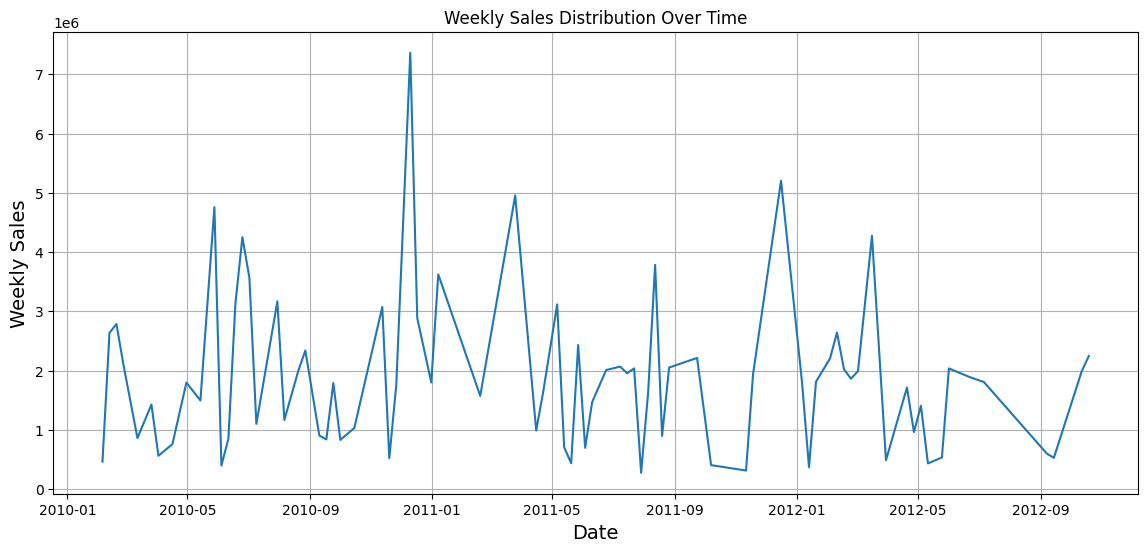

In [18]:
weekly_sales_distrib = df_sumsales.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(14, 6))
plt.plot(weekly_sales_distrib.index, weekly_sales_distrib.values)
plt.title('Weekly Sales Distribution Over Time')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.grid(True)
plt.show()

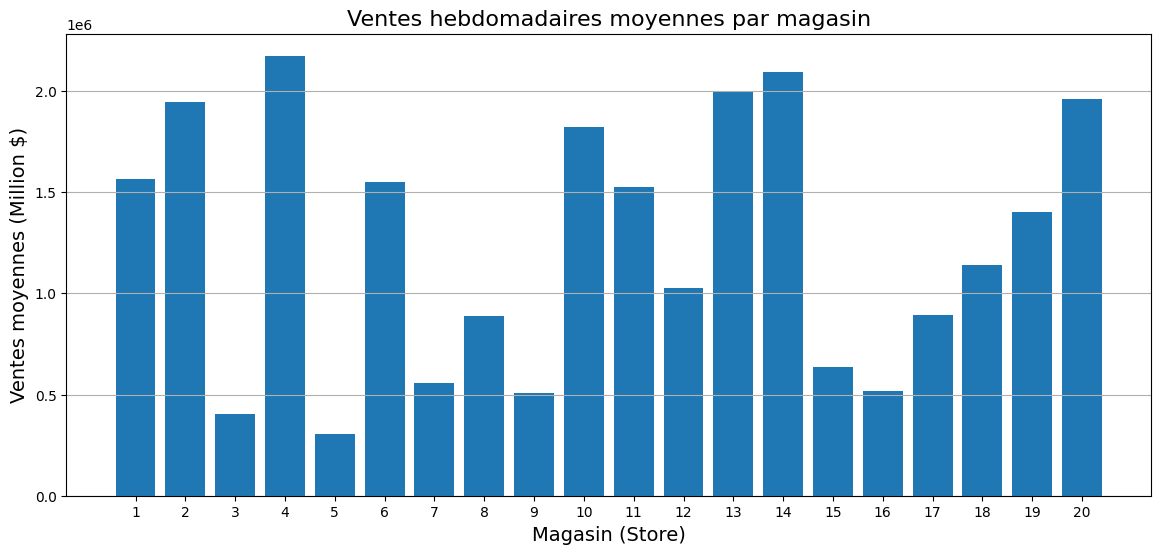

In [19]:
# Calculer la somme des ventes hebdomadaires par magasin
store_sales = df_sumsales.groupby('Store')['Weekly_Sales'].mean()

# Tracer un graphique des ventes moyennes par magasin
plt.figure(figsize=(14,6))
plt.bar(store_sales.index, store_sales.values)
plt.title('Ventes hebdomadaires moyennes par magasin', fontsize=16)
plt.xlabel('Magasin (Store)', fontsize=14)
plt.ylabel('Ventes moyennes (Million $)', size=14)
plt.xticks(store_sales.index)
plt.grid(axis='y')
plt.show()

In [20]:
from plotly.subplots import make_subplots

# Créer une figure avec une grille de 2x3
fig = make_subplots(rows=2, cols=3, subplot_titles=('Temperature', 'Fuel Price', 'CPI', 'Unemployment'))

# Ajouter les boîtes à moustaches à la figure
fig.add_trace(go.Box(y=df['Temperature'], name='Temperature'), row=1, col=1)
fig.add_trace(go.Box(y=df['Fuel_Price'], name='Fuel Price'), row=1, col=2)
fig.add_trace(go.Box(y=df['CPI'], name='CPI'), row=1, col=3)
fig.add_trace(go.Box(y=df['Unemployment'], name='Unemployment'), row=2, col=1)

# Mise en page
fig.update_layout(height=600, width=800, title_text="Distribution des variables")

# Afficher la figure
fig.show()

In [21]:
columns_outlied = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

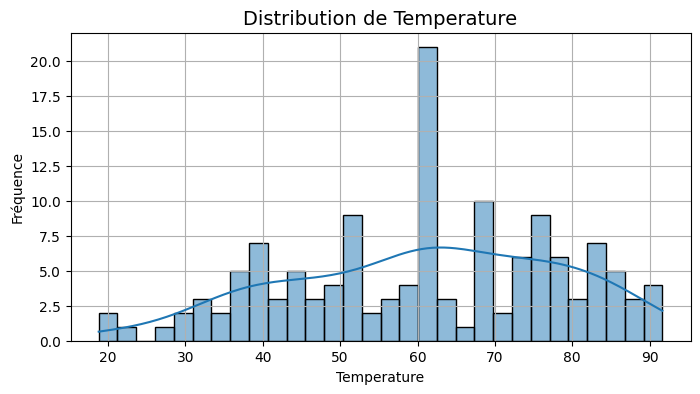

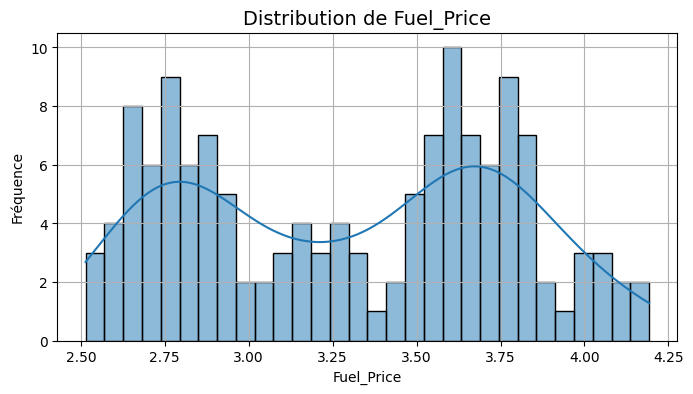

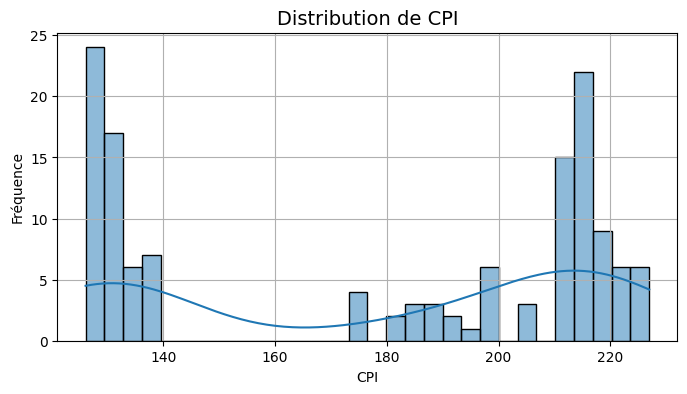

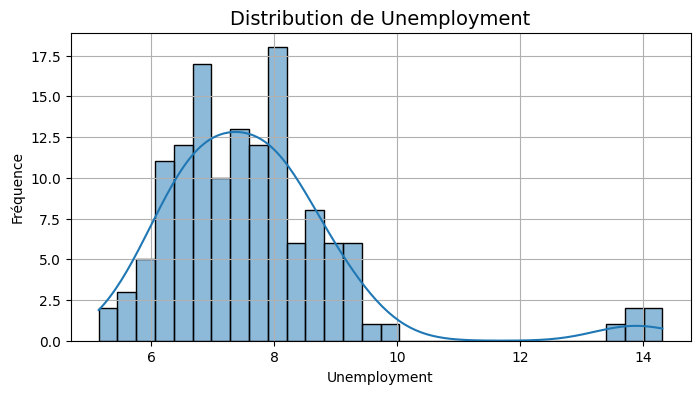

In [22]:
import seaborn as sns

# Colonnes à vérifier
columns_outlied = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Tracer la distribution pour chaque colonne
for col in columns_outlied:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_sumsales[col], kde=True, bins=30)
    plt.title(f'Distribution de {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(True)
    plt.show()

In [23]:
#traitement des outliers sur Unemployment uniquement avec la méthode IQR (Interquartile Range)
# Calculer le premier et le troisième quartile
q1 = df_sumsales['Unemployment'].quantile(0.25)
q3 = df_sumsales['Unemployment'].quantile(0.75)
iqr = q3 - q1

# Définir les limites inférieure et supérieure
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrer les valeurs aberrantes
df_no_outliers = df_sumsales[(df_sumsales['Unemployment'] >= lower_bound) & (df_sumsales['Unemployment'] <= upper_bound)].copy()

# Nombre de lignes supprimées
removed_rows = df_sumsales.shape[0] - df_no_outliers.shape[0]
print(f"Nombre de lignes supprimées : {removed_rows}, {df_no_outliers.shape[0]} lignes restantes")

Nombre de lignes supprimées : 5, 131 lignes restantes


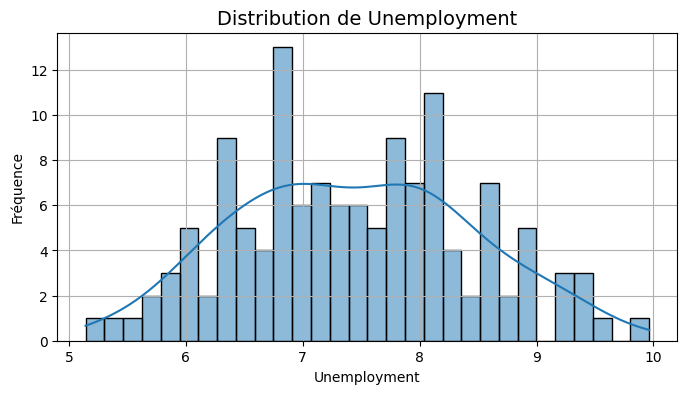

In [24]:
# Tracer la distribution pour chaque colonne
plt.figure(figsize=(8, 4))
sns.histplot(df_no_outliers['Unemployment'], kde=True, bins=30)
plt.title(f'Distribution de Unemployment', fontsize=14)
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

In [25]:
#df_no_outliers.to_csv('Walmart_Store_sales_cleaned.csv', index=False)

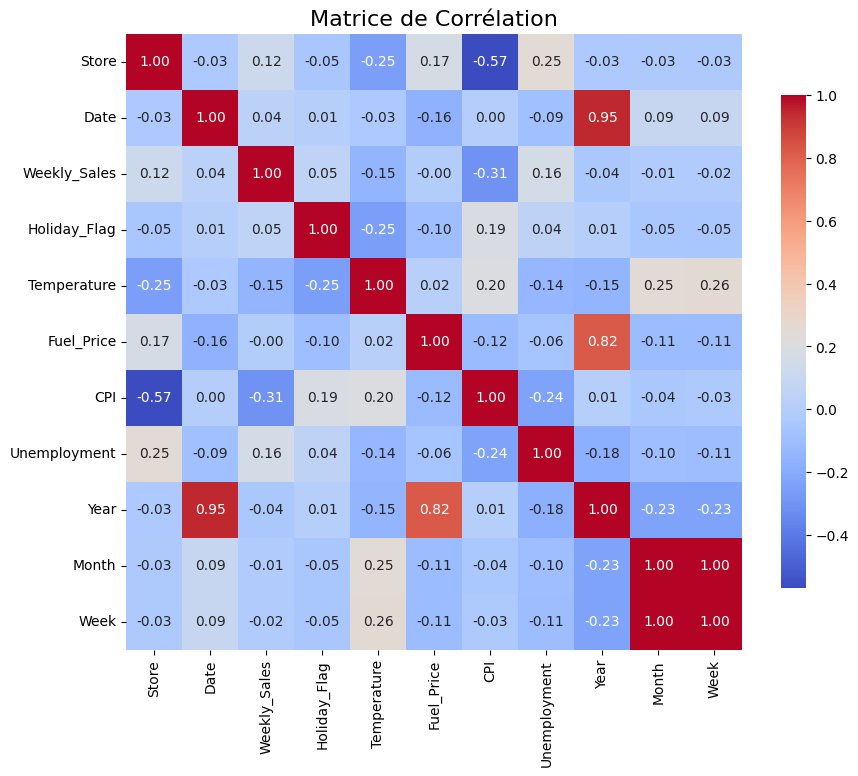

In [26]:
#matrice de corrélation
correlation_matrix = df_no_outliers.corr()

#traçage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation', fontsize=16)
plt.show()

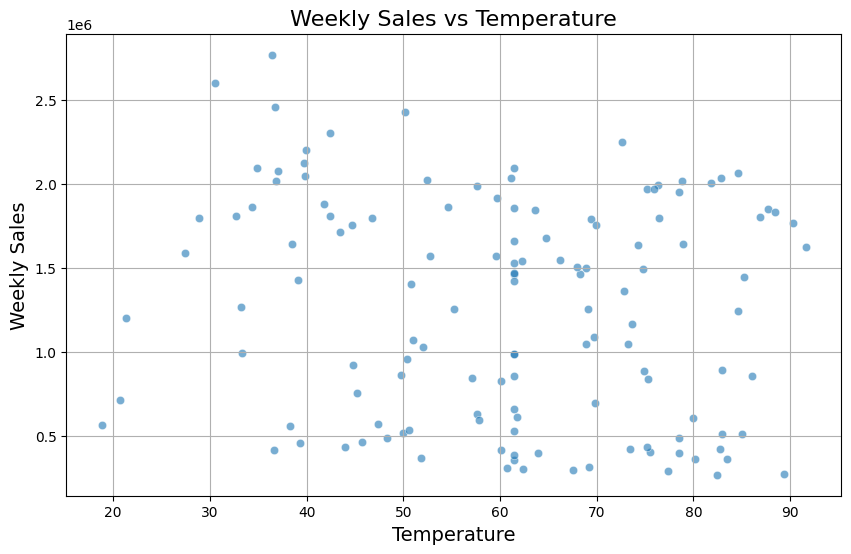

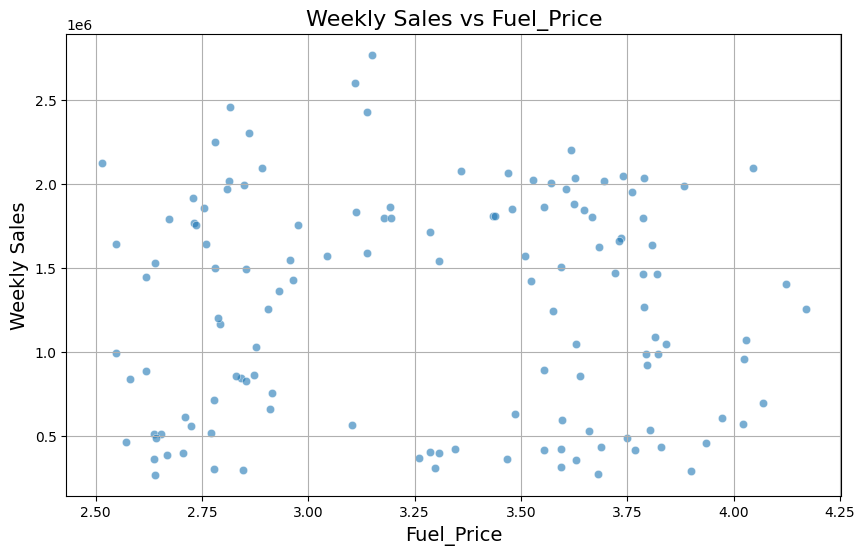

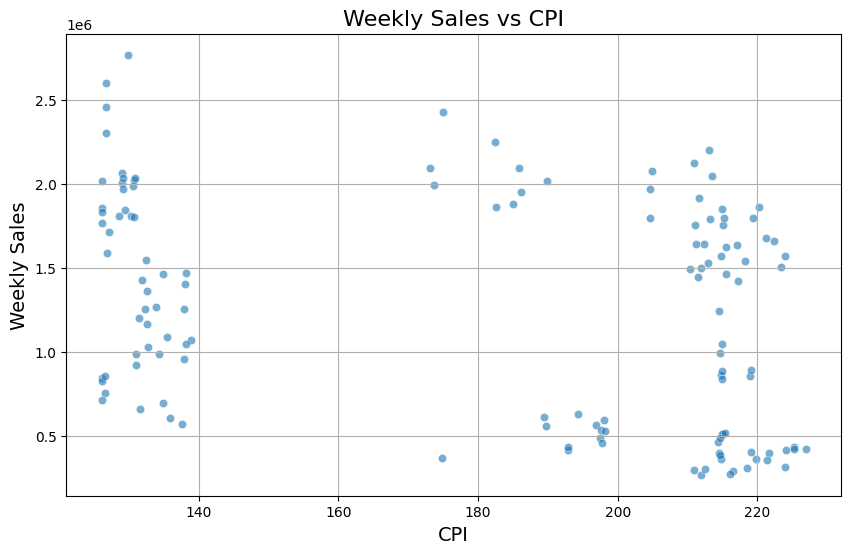

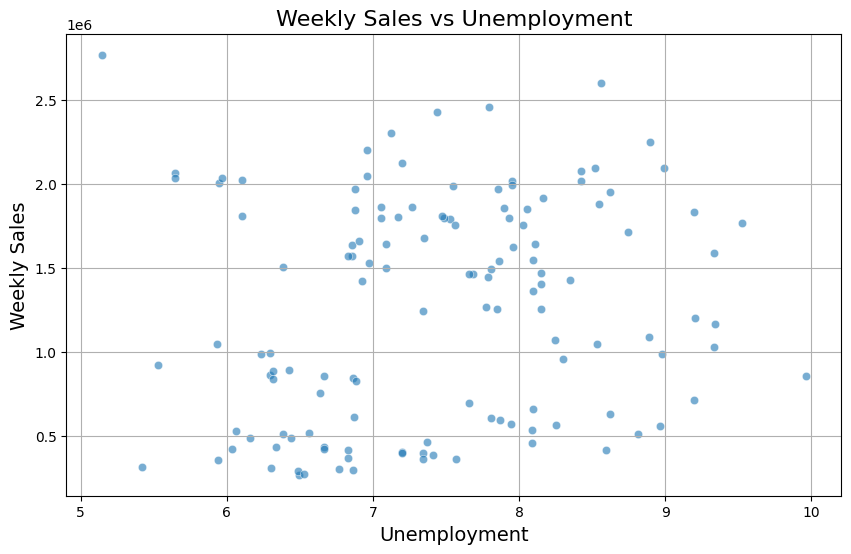

In [27]:
variables_to_plot = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for var in variables_to_plot:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df_no_outliers, x=var, y='Weekly_Sales', alpha=0.6)
    plt.title(f'Weekly Sales vs {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Weekly Sales', fontsize=14)
    plt.grid(True)
    plt.show()

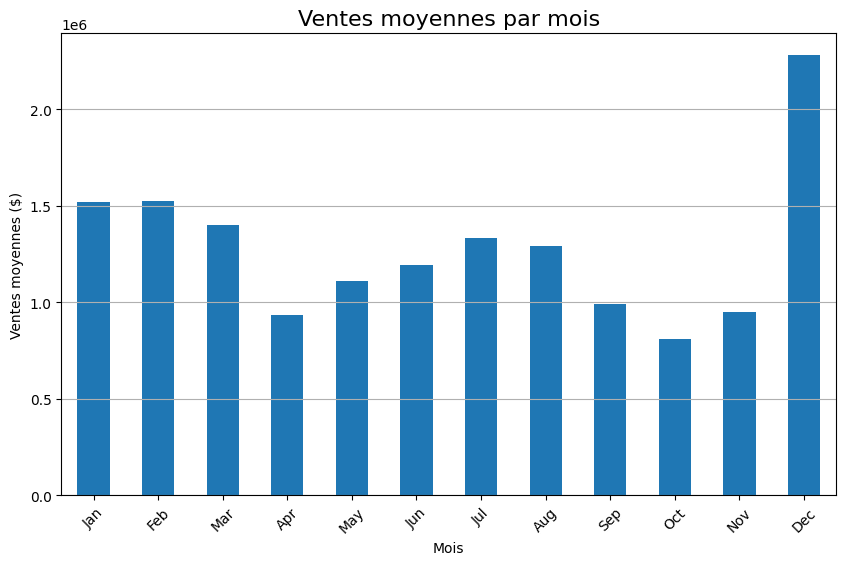

In [28]:
sales_by_month = df_no_outliers.groupby('Month')['Weekly_Sales'].mean()
#sales_by_month['Month'] = sales_by_month['Month'].astype(str)  # Convertir en chaîne pour l'affichage

plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar')
plt.title('Ventes moyennes par mois', fontsize=16)
plt.xlabel('Mois')
plt.ylabel('Ventes moyennes ($)')
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.show()

**PREPROCESSING NUMERICAL AND CATEGORICAL**

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [30]:
df_no_outliers.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week'],
      dtype='object')

In [31]:
#On définit les variables explicatives
X = df_no_outliers[['Store', 'Holiday_Flag', 'Temperature', 'CPI', 'Unemployment', 'Year', 'Month']]

y = df_no_outliers['Weekly_Sales']

print(X.shape, y.shape)
print(X.head())
print('-----'*50)
print(y.head())

(131, 7) (131,)
     Store  Holiday_Flag  Temperature         CPI  Unemployment    Year  Month
67     3.0           0.0    45.710000  214.424881      7.368000  2010.0    2.0
44     1.0           1.0    38.510000  211.242170      8.106000  2010.0    2.0
107    8.0           1.0    33.340000  214.621419      6.299000  2010.0    2.0
112    2.0           0.0    39.690000  210.945160      7.196667  2010.0    2.0
115   15.0           0.0    61.398106  131.637000      8.094333  2010.0    2.0
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
67      461622.22
44     1641957.44
107     994801.40
112    2124451.54
115     660838.75
Name: Weekly_Sales, dtype: float64


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(104, 7) (27, 7)


In [33]:
X_train

,Store,Holiday_Flag,Temperature,CPI,Unemployment,Year,Month
39,5.0,0.0,60.710000,218.569962,6.300,2011.0,11.0
70,18.0,0.0,27.400000,126.850789,9.331,2010.0,12.0
67,3.0,0.0,45.710000,214.424881,7.368,2010.0,2.0
95,1.0,0.0,74.780000,210.337426,7.808,2010.0,5.0
80,9.0,0.0,49.960000,215.437285,6.560,2010.0,11.0
...,...,...,...,...,...,...,...
148,8.0,0.0,86.050000,219.007525,9.964,2011.0,8.0
122,7.0,1.0,57.840000,198.095048,7.872,2012.0,9.0
5,4.0,0.0,61.398106,126.160226,7.896,2010.0,5.0
13,1.0,0.0,64.740000,221.211813,7.348,2012.0,3.0


In [34]:
    #Variables catégorielles et numériques
categorical_features = ['Store', 'Holiday_Flag']
numerical_features = ['Temperature', 'CPI', 'Unemployment', 'Year', 'Month']

#pas de valeur manquante dans les variables explicatives donc on passe directement à la normalisation

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#Assemblage avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [35]:
preprocessor.fit(X_train, y_train)
# Étape 2 : récupérer les noms des colonnes encodées
# Pour les numériques, pas besoin de get_feature_names_out si on connaît déjà les noms
num_cols_transformed = numerical_features

# Pour les catégorielles encodées
cat_encoder = preprocessor.named_transformers_['cat']
cat_cols_transformed = cat_encoder.get_feature_names_out(categorical_features)

# Étape 3 : concaténer tous les noms de colonnes finales
final_feature_names = list(num_cols_transformed) + list(cat_cols_transformed)

# Étape 4 : transformer les données et en faire un DataFrame
X_train_transformed = preprocessor.transform(X_train)
X_train_df = pd.DataFrame(X_train_transformed.toarray() if hasattr(X_train_transformed, "toarray") else X_train_transformed,
                          columns=final_feature_names)

# Afficher un aperçu
print(f"Nombre total de features après transformation : {X_train_df.shape[1]}")
X_train_df.head()

Nombre total de features après transformation : 26


,Temperature,CPI,Unemployment,Year,Month,Store_1.0,Store_2.0,Store_3.0,Store_4.0,Store_5.0,...,Store_13.0,Store_14.0,Store_15.0,Store_16.0,Store_17.0,Store_18.0,Store_19.0,Store_20.0,Holiday_Flag_0.0,Holiday_Flag_1.0
0,0.062060,0.948452,-1.211758,0.207449,1.603776,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.840845,-1.401086,1.901917,-1.111336,1.942013,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.794847,0.842269,-0.114627,-1.111336,-1.440358,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.865839,0.737562,0.337375,-1.111336,-0.425647,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.552057,0.868204,-0.944666,-1.111336,1.603776,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**LINEAR REGRESSOR BASELINE**

In [36]:
model_lr_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

In [37]:
model_lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'CPI',
                                                   'Unemployment', 'Year',
                                                   'Month']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Store', 'Holiday_Flag'])])),
                ('regressor', LinearRegression())])

In [38]:
y_train_pred = model_lr_pipeline.predict(X_train)
y_test_pred = model_lr_pipeline.predict(X_test)

compare_df = pd.DataFrame({'Vraies ventes': y_test.values, 'Prédictions': y_test_pred})

compare_df.head()

,Vraies ventes,Prédictions
0,988157.72,1.072854e+06
1,301827.36,3.855007e+05
2,2248645.59,2.054013e+06
3,1166117.85,1.128859e+06
4,1205307.50,1.175394e+06


In [39]:
#Performance du modèle

#RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

#Calcul du R²
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print("r2 score on training set: {:.3f}".format(r2_train))
print("r2 score on test set: {:.3f}".format(r2_test))
print("RMSE sore on test set: {:.3f}".format(rmse))

r2 score on training set: 0.967
r2 score on test set: 0.951
RMSE sore on test set: 158956.150


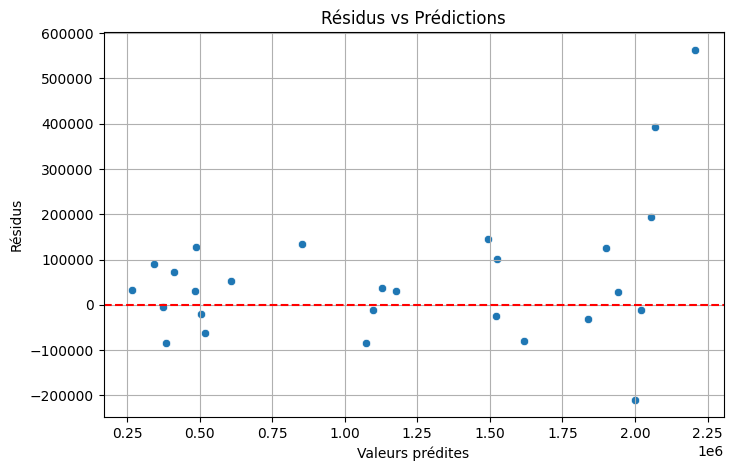

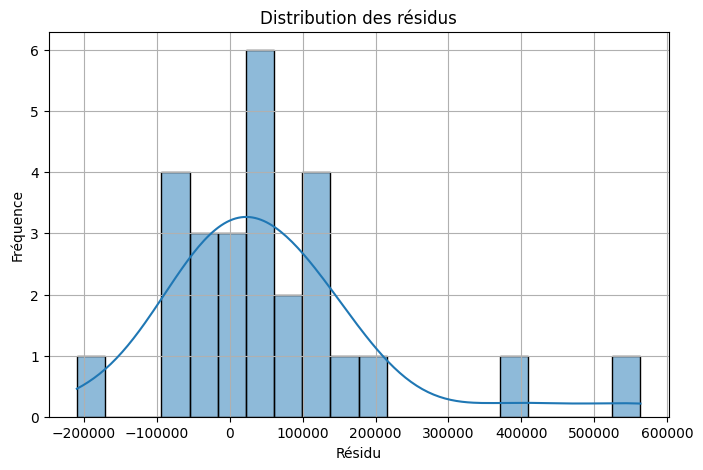

In [40]:
# Prédictions
residuals = y_test - y_test_pred

# 1. Résidus vs Prédictions
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Résidus vs Prédictions')
plt.grid(True)
plt.show()

# 2. Histogramme des résidus
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Distribution des résidus')
plt.xlabel('Résidu')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

**RIDGE MODEL**

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [42]:
model_ridge_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Ridge())
])

param_grid = {
    'regressor__alpha': [0.05, 0.1, 0.3, 0.5 ,0.7, 1, 3, 5, 10, 20, 50, 100, 150, 200, 230, 250,265]
}

grid_search_ridge = GridSearchCV(
    model_ridge_pipeline,
    param_grid,
    cv=5,
    scoring='r2',
)

In [43]:
grid_search_ridge.fit(X_train, y_train)

best_alpha = grid_search_ridge.best_params_['regressor__alpha']
best_ridge_model = grid_search_ridge.best_estimator_

best_alpha, best_ridge_model


# Affichage des meilleurs paramètres
print("Meilleurs paramètres Ridge:", best_alpha)

Meilleurs paramètres Ridge: 0.1


In [44]:
y_pred_ridge = best_ridge_model.predict(X_test)
y_train_pred_ridge = best_ridge_model.predict(X_train)

rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge_test = r2_score(y_test, y_pred_ridge)
r2_ridge_train = r2_score(y_train, y_train_pred_ridge)

print("Ridge r2 score on training set: {:.3f}".format(r2_ridge_train))
print("Ridge r2 score on test set: {:.3f}".format(r2_ridge_test))
print("Ridge RMSE sore on test set: {:.3f}".format(rmse_ridge_test))


Ridge r2 score on training set: 0.966
Ridge r2 score on test set: 0.949
Ridge RMSE sore on test set: 162940.988


**LASSO**

In [45]:
from sklearn.linear_model import Lasso

In [46]:
model_lasso_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Lasso(max_iter=1000000))
])
param_grid_lasso = {
    'regressor__alpha': [5, 10, 20, 30, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 700, 900, 1000, 2000, 3000]
}

grid_search_lasso = GridSearchCV(
    model_lasso_pipeline,
    param_grid_lasso,
    cv=5,
    scoring='r2',
)

grid_search_lasso.fit(X_train, y_train)

# Meilleur alpha trouvé
best_alpha_lasso = grid_search_lasso.best_params_['regressor__alpha']
best_lasso_model = grid_search_lasso.best_estimator_

print("Meilleurs paramètres Lasso:", best_alpha_lasso)
print("Meilleur modèle Lasso:", best_lasso_model)

Meilleurs paramètres Lasso: 900
Meilleur modèle Lasso: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'CPI',
                                                   'Unemployment', 'Year',
                                                   'Month']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Store', 'Holiday_Flag'])])),
                ('regressor', Lasso(alpha=900, max_iter=1000000))])


In [47]:
y_pred_lasso = best_lasso_model.predict(X_test)
y_train_pred_lasso = best_lasso_model.predict(X_train)

rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso_test = r2_score(y_test, y_pred_lasso)
r2_lasso_train = r2_score(y_train, y_train_pred_lasso)

print("Lasso r2 score on training set: {:.3f}".format(r2_lasso_train))
print("Lasso r2 score on test set: {:.3f}".format(r2_lasso_test))
print("Lasso RMSE sore on test set: {:.3f}".format(rmse_lasso_test))

Lasso r2 score on training set: 0.966
Lasso r2 score on test set: 0.947
Lasso RMSE sore on test set: 166008.961


In [48]:
model_results = pd.DataFrame({
    'Modèle': ['Régression linéaire', 'Ridge', 'Lasso'],
    'R2 Train': ['{:.3f}'.format(r2_train), '{:.3f}'.format(r2_ridge_train), '{:.3f}'.format(r2_lasso_train)],
    'R2 Test': ['{:.3f}'.format(r2_test), '{:.3f}'.format(r2_ridge_test), '{:.3f}'.format(r2_lasso_test)],
    'RMSE Test': ['{:.0f}'.format(rmse), '{:.0f}'.format(rmse_ridge_test), '{:.0f}'.format(rmse_lasso_test)]
})

model_results

,Modèle,R2 Train,R2 Test,RMSE Test
0,Régression linéaire,0.967,0.951,158956
1,Ridge,0.966,0.949,162941
2,Lasso,0.966,0.947,166009


In [49]:
# créer un Plot coefficients
ridge_coefs = grid_search_ridge.best_estimator_.named_steps['regressor'].coef_
lasso_coefs = grid_search_lasso.best_estimator_.named_steps['regressor'].coef_
lr_coefs = model_lr_pipeline.named_steps['regressor'].coef_

# Récupérer l'encodage
preprocessor_lasso = grid_search_lasso.best_estimator_.named_steps['preprocessing']
ohe = preprocessor_lasso.named_transformers_['cat']

# 1. Noms des variables après OneHotEncoding
encoded_feature_names = ohe.get_feature_names_out(categorical_features)

# 2. Fusionner avec les variables numériques
all_feature_names = list(encoded_feature_names) + numerical_features

# 3. Créer le DataFrame des coefficients
coefs_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Ridge Coefficients': ridge_coefs,
    'Lasso Coefficients': lasso_coefs,
    'Linear Regression Coefficients': lr_coefs
})

coefs_df

,Feature,Ridge Coefficients,Lasso Coefficients,Linear Regression Coefficients
0,Store_1.0,-27387.581918,-2.796876e+04,-28893.234603
1,Store_2.0,-66622.878793,-4.607558e+04,-47075.768837
2,Store_3.0,-18399.715596,-1.565362e+04,-24659.007310
3,Store_4.0,-12673.736664,-1.324654e+04,-15519.138307
4,Store_5.0,42322.789328,4.166611e+04,46627.578157
5,Store_6.0,373367.717356,2.241133e+05,366384.520937
6,Store_7.0,757991.547709,6.130093e+05,757407.195851
7,Store_8.0,-768039.130233,-9.119468e+05,-796215.946719
8,Store_9.0,685387.458926,5.828963e+05,722162.503751
9,Store_10.0,-881206.482369,-1.022314e+06,-921476.786773


In [56]:
# Rechargement du tableau des coefficients
coefs_df_sorted = coefs_df.sort_values(by='Ridge Coefficients', ascending=False)

In [53]:
# Prépare les traces pour chaque modèle
fig = go.Figure()

fig.add_trace(go.Bar(
    y=coefs_df_sorted['Feature'],
    x=coefs_df_sorted['Ridge Coefficients'],
    name='Ridge',
    orientation='h',
    marker_color='steelblue'
))

fig.add_trace(go.Bar(
    y=coefs_df_sorted['Feature'],
    x=coefs_df_sorted['Lasso Coefficients'],
    name='Lasso',
    orientation='h',
    marker_color='orange'
))

fig.add_trace(go.Bar(
    y=coefs_df_sorted['Feature'],
    x=coefs_df_sorted['Linear Regression Coefficients'],
    name='Régression linéaire',
    orientation='h',
    marker_color='green'
))

# Layout lisible
fig.update_layout(
    title='Comparaison des coefficients Ridge vs Lasso vs Linéaire',
    barmode='group',  # 'overlay' pour superposer, 'stack' pour empiler
    xaxis_title='Coefficient',
    yaxis_title='Variables',
    template='plotly_white',
    legend=dict(x=0.8, y=1.1),
    height=800
)

fig.show()

In [ ]:
#import joblib
#joblib.dump(model_lr_pipeline, 'model_lr_pipeline.pkl')